In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.dates as mdates
from datetime import datetime


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("running log.csv")
df.head()

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Best Lap Time,Number of Laps
0,Running,7/15/20 9:41,Cherry Hill Running,6.00,530,0:43:55,141,160,176,182,7:19,6:20,169,173,1.26,00:02.3,7
1,Running,7/14/20 17:45,Cherry Hill Running,6.50,587,0:47:04,144,160,172,182,7:14,6:35,183,187,1.29,03:32.7,7
2,Running,7/13/20 18:57,Cherry Hill Running,5.01,392,0:40:29,128,151,170,180,8:05,5:49,124,124,1.17,00:04.1,6
3,Running,7/12/20 18:44,Cherry Hill Running,7.01,633,0:52:55,142,157,172,180,7:33,5:00,215,219,1.24,00:05.1,8
4,Running,7/11/20 19:35,Cherry Hill Running,5.19,419,0:41:35,129,143,170,178,8:01,6:48,76,80,1.18,01:27.1,6


In [4]:
df.isna().sum()  # number of NA values per column


Activity Type        0
Date                 0
Title                0
Distance             0
Calories             0
Time                 0
Avg HR               0
Max HR               0
Avg Run Cadence      0
Max Run Cadence      0
Avg Pace             0
Best Pace            0
Elev Gain            0
Elev Loss            0
Avg Stride Length    0
Best Lap Time        0
Number of Laps       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Activity Type      689 non-null    object 
 1   Date               689 non-null    object 
 2   Title              689 non-null    object 
 3   Distance           689 non-null    float64
 4   Calories           689 non-null    object 
 5   Time               689 non-null    object 
 6   Avg HR             689 non-null    object 
 7   Max HR             689 non-null    object 
 8   Avg Run Cadence    689 non-null    object 
 9   Max Run Cadence    689 non-null    object 
 10  Avg Pace           689 non-null    object 
 11  Best Pace          689 non-null    object 
 12  Elev Gain          689 non-null    object 
 13  Elev Loss          689 non-null    object 
 14  Avg Stride Length  689 non-null    float64
 15  Best Lap Time      689 non-null    object 
 16  Number of Laps     689 non

In [6]:
# Specify the columns you want to convert to float
columns_to_convert = [
    'Calories', 'Avg HR', 'Max HR', 'Avg Run Cadence',
    'Max Run Cadence', 'Elev Gain', 'Elev Loss'
]

# Use the pd.to_numeric function to convert the specified columns to float
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# The 'errors' parameter is set to 'coerce' to handle any non-numeric values by converting them to NaN.

# Now, the specified columns in the DataFrame are of float data type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Activity Type      689 non-null    object 
 1   Date               689 non-null    object 
 2   Title              689 non-null    object 
 3   Distance           689 non-null    float64
 4   Calories           634 non-null    float64
 5   Time               689 non-null    object 
 6   Avg HR             663 non-null    float64
 7   Max HR             663 non-null    float64
 8   Avg Run Cadence    660 non-null    float64
 9   Max Run Cadence    660 non-null    float64
 10  Avg Pace           689 non-null    object 
 11  Best Pace          689 non-null    object 
 12  Elev Gain          621 non-null    float64
 13  Elev Loss          624 non-null    float64
 14  Avg Stride Length  689 non-null    float64
 15  Best Lap Time      689 non-null    object 
 16  Number of Laps     689 non

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
def to_minutes(time):
  """ Converts hrs:mins:secs (or mins:secs.millisecs) to minutes (float) """
  res = 0
  if not isinstance(time, list):
    return time
  if len(time) == 2:
    res += float(time[0])       # Minutes
    res += float(time[1]) / 60  # Seconds
  if len(time) == 3:
    res += float(time[0]) * 60  # Hours
    res += float(time[1])       # Minutes
    res += float(time[2]) / 60  # Seconds
  return float(res)

def time_to_mins(time_col):
  """ Takes a column and applies the to_minutes function to it """
  temp = time_col
  temp = temp.apply(lambda x: x.split(":") if isinstance(x, str) else x)  # splitting timestamp into hours, minutes and seconds.
  temp = temp.apply(to_minutes)
  return temp

In [10]:
df["Time"] = time_to_mins(df["Time"])
df["Avg Pace"] = time_to_mins(df["Avg Pace"])
df["Best Pace"] = time_to_mins(df["Best Pace"])
df["Best Lap Time"] = time_to_mins(df["Best Lap Time"])

In [11]:
df = df.rename(columns={'Time': 'Time taken'})

In [12]:
df['Time'] = df['Date'].dt.time  # Extract the time part
df['Date'] = df['Date'].dt.date  # Extract the date part

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Activity Type      689 non-null    object 
 1   Date               689 non-null    object 
 2   Title              689 non-null    object 
 3   Distance           689 non-null    float64
 4   Calories           634 non-null    float64
 5   Time taken         689 non-null    float64
 6   Avg HR             663 non-null    float64
 7   Max HR             663 non-null    float64
 8   Avg Run Cadence    660 non-null    float64
 9   Max Run Cadence    660 non-null    float64
 10  Avg Pace           689 non-null    float64
 11  Best Pace          689 non-null    float64
 12  Elev Gain          621 non-null    float64
 13  Elev Loss          624 non-null    float64
 14  Avg Stride Length  689 non-null    float64
 15  Best Lap Time      689 non-null    float64
 16  Number of Laps     689 non

In [14]:
df.head()

,Activity Type,Date,Title,Distance,Calories,Time taken,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Best Lap Time,Number of Laps,Time
0,Running,2020-07-15,Cherry Hill Running,6.00,530.0,43.916667,141.0,160.0,176.0,182.0,7.316667,6.333333,169.0,173.0,1.26,0.038333,7,09:41:00
1,Running,2020-07-14,Cherry Hill Running,6.50,587.0,47.066667,144.0,160.0,172.0,182.0,7.233333,6.583333,183.0,187.0,1.29,3.545000,7,17:45:00
2,Running,2020-07-13,Cherry Hill Running,5.01,392.0,40.483333,128.0,151.0,170.0,180.0,8.083333,5.816667,124.0,124.0,1.17,0.068333,6,18:57:00
3,Running,2020-07-12,Cherry Hill Running,7.01,633.0,52.916667,142.0,157.0,172.0,180.0,7.550000,5.000000,215.0,219.0,1.24,0.085000,8,18:44:00
4,Running,2020-07-11,Cherry Hill Running,5.19,419.0,41.583333,129.0,143.0,170.0,178.0,8.016667,6.800000,76.0,80.0,1.18,1.451667,6,19:35:00


In [15]:
df["Best Lap Time"].min()

0.0

In [16]:
# Calculate the average of non-zero values in the "Best Lap Time" column
average_best_lap_time = df[df['Best Lap Time'] != 0]['Best Lap Time'].mean()

# Define a function to replace 0 values with average plus or minus a random number
def replace_with_random_around_average(value):
    if value == 0:
        random_adjustment = np.random.uniform(-average_best_lap_time, average_best_lap_time)
        return average_best_lap_time + random_adjustment
    return value

# Apply the function to the "Best Lap Time" column
df['Best Lap Time'] = df['Best Lap Time'].apply(replace_with_random_around_average)


In [17]:
df.isna().sum()  # number of NA values per column

Activity Type         0
Date                  0
Title                 0
Distance              0
Calories             55
Time taken            0
Avg HR               26
Max HR               26
Avg Run Cadence      29
Max Run Cadence      29
Avg Pace              0
Best Pace             0
Elev Gain            68
Elev Loss            65
Avg Stride Length     0
Best Lap Time         0
Number of Laps        0
Time                  0
dtype: int64

In [18]:
df.shape

(689, 18)

In [19]:
# Calculate the column-wise mean, ignoring NaN values
column_means = df.mean(numeric_only=True)

# Fill missing values with the calculated mean for each column
df.fillna(column_means, inplace=True)

In [20]:
df.isna().sum()  # number of NA values per column

Activity Type        0
Date                 0
Title                0
Distance             0
Calories             0
Time taken           0
Avg HR               0
Max HR               0
Avg Run Cadence      0
Max Run Cadence      0
Avg Pace             0
Best Pace            0
Elev Gain            0
Elev Loss            0
Avg Stride Length    0
Best Lap Time        0
Number of Laps       0
Time                 0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Activity Type      689 non-null    object 
 1   Date               689 non-null    object 
 2   Title              689 non-null    object 
 3   Distance           689 non-null    float64
 4   Calories           689 non-null    float64
 5   Time taken         689 non-null    float64
 6   Avg HR             689 non-null    float64
 7   Max HR             689 non-null    float64
 8   Avg Run Cadence    689 non-null    float64
 9   Max Run Cadence    689 non-null    float64
 10  Avg Pace           689 non-null    float64
 11  Best Pace          689 non-null    float64
 12  Elev Gain          689 non-null    float64
 13  Elev Loss          689 non-null    float64
 14  Avg Stride Length  689 non-null    float64
 15  Best Lap Time      689 non-null    float64
 16  Number of Laps     689 non

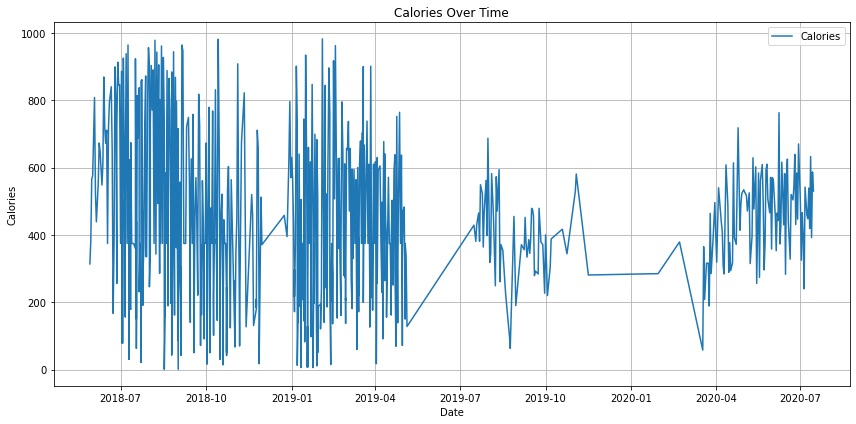

In [22]:
# Sort the DataFrame by the 'Date' column
df = df.sort_values(by='Date')

# Create the time series line plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Calories'], label='Calories')
plt.title('Calories Over Time')
plt.xlabel('Date')
plt.ylabel('Calories')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

In [23]:
df.to_csv("orig running log_cleaned.csv")

In [26]:
# distance = np.random.uniform(df['Distance'].min(), df['Distance'].max())
# calories = np.random.uniform(df['Calories'].min(), df['Calories'].max())
# max_hr_model = LinearRegression().fit(df[['Distance', 'Time taken']], df['Max HR'])
# mhr= max_hr_model.predict([[distance, time_taken]])[0]
# print(mhr)

In [28]:
import pandas as pd
import numpy as np
from datetime import datetime
import random
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta


# Define activity types and titles
activity_types = ["Running", "Cardio", "Treadmill Running"]
titles = df['Title'].unique()

# Define the date range for ndf
start_date = datetime(2021, 1, 1)
end_date = datetime(2023, 9, 30)

# Create a list to store generated data
ndf_data = []

# Create Linear Regression models
distance_model = LinearRegression().fit(df[['Calories']], df['Distance'])
time_model = LinearRegression().fit(df[['Distance', 'Calories']], df['Time taken'])
max_hr_model = LinearRegression().fit(df[['Distance', 'Time taken']], df['Max HR'])
num_laps_model = LinearRegression().fit(df[['Distance', 'Time taken']], df['Number of Laps'])

# Define the start and end date for the date range
start_date = datetime(2021, 1, 1)
end_date = datetime(2023, 10, 31)

# Generate data for each year (2021, 2022, 2023)
for year in range(2021, 2024):
    # Generate a random number of entries (between 350 and 500) per year
    num_entries = random.randint(350, 500)
    
    for _ in range(num_entries):
        # Generate a random date within the specified year
        date = start_date + timedelta(days=random.randint(0, (end_date - start_date).days))
        
        # Skip some dates randomly (about 30% of the time)
        if random.random() < 0.3:
            continue
            
        # Randomly select activity type, title, and distance
        activity_type = random.choice(activity_types)
        title = random.choice(titles)

        # Generate random values for the columns
        distance = np.random.uniform(df['Distance'].min(), df['Distance'].max())
        calories = np.random.uniform(df['Calories'].min(), df['Calories'].max())

        # Use linear regression models to predict values
        time_taken = time_model.predict([[distance, calories]])[0]
        max_hr = max_hr_model.predict([[distance, time_taken]])[0]
        num_laps = num_laps_model.predict([[distance, time_taken]])[0]

        # Remaining values are generated as before
        avg_hr = np.random.uniform(df['Avg HR'].min(), df['Avg HR'].max())
        max_run_cadence = np.random.uniform(df['Max Run Cadence'].min(), df['Max Run Cadence'].max())
        avg_run_cadence = np.random.uniform(df['Avg Run Cadence'].min(), df['Avg Run Cadence'].max())
        avg_pace = time_taken / distance
        best_pace = avg_pace - np.random.uniform(0.2, 1.0)
        elev_gain = np.random.uniform(df['Elev Gain'].min(), df['Elev Gain'].max())
        elev_loss = np.random.uniform(df['Elev Loss'].min(), df['Elev Loss'].max())
        avg_stride_length = np.random.uniform(df['Avg Stride Length'].min(), df['Avg Stride Length'].max())
        best_lap_time = np.random.uniform(df['Best Lap Time'].min(), df['Best Lap Time'].max())

        # Randomly generate a time between 4 am and 10 pm
        time = date.replace(hour=random.randint(4, 21), minute=random.randint(0, 59))

        # Append the data for this row
        ndf_data.append([activity_type, date, title, distance, calories, time_taken, avg_hr, max_hr,
                         avg_run_cadence, max_run_cadence, avg_pace, best_pace, elev_gain, elev_loss,
                         avg_stride_length, best_lap_time, num_laps, time])

# Create the new DataFrame ndf
columns = ["Activity Type", "Date", "Title", "Distance", "Calories", "Time taken", "Avg HR", "Max HR",
           "Avg Run Cadence", "Max Run Cadence", "Avg Pace", "Best Pace", "Elev Gain", "Elev Loss",
           "Avg Stride Length", "Best Lap Time", "Number of Laps", "Time"]

ndf = pd.DataFrame(ndf_data, columns=columns)


In [30]:
ndf.head()

,Activity Type,Date,Title,Distance,Calories,Time taken,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Best Lap Time,Number of Laps,Time
0,Running,2022-11-21,Boca Raton - Running,6.879713,152.555302,46.485689,62.133427,168.050296,170.090552,158.211965,6.756923,6.176382,307.192863,104.088336,1.117171,6.309177,7.150603,2022-11-21 17:54:00
1,Cardio,2022-04-21,Cherry Hill Running,9.551464,311.968869,65.185168,163.471330,170.292494,153.263837,135.775478,6.824626,6.030021,926.123145,183.277195,0.154813,3.295286,9.700875,2022-04-21 15:29:00
2,Running,2023-03-31,Pennsauken Running,3.888873,745.983550,29.980204,186.599338,160.886954,133.069386,195.178710,7.709227,7.481348,21.053763,681.580962,1.678659,6.546572,4.478207,2023-03-31 04:04:00
3,Cardio,2022-11-23,Cardio,13.646081,14.358255,90.734915,157.238234,176.995818,189.715958,218.900488,6.649156,6.258493,592.377406,200.665379,0.877303,4.409442,13.481218,2022-11-23 18:49:00
4,Running,2023-05-19,Fairfax County Running,11.946240,717.716828,83.453795,155.782026,170.717566,161.542025,191.816784,6.985779,6.722256,461.035619,780.695356,1.501836,1.920892,12.048898,2023-05-19 18:10:00


In [31]:
cdf = pd.concat([df, ndf], ignore_index=True)


In [32]:
cdf = cdf.round(3)


In [33]:
cdf['Best Lap Time'].min()

0.001

In [34]:
cdf.head()

,Activity Type,Date,Title,Distance,Calories,Time taken,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Best Lap Time,Number of Laps,Time
0,Running,2018-05-29,Baltimore Running,4.02,314.0,29.533,150.0,173.0,170.0,178.0,7.350,6.267,197.0,204.0,1.29,1.930,5.0,18:53:00
1,Running,2018-05-30,Baltimore Running,4.15,383.0,30.467,147.0,164.0,168.0,176.0,7.333,5.900,180.0,177.0,1.30,2.090,5.0,18:30:00
2,Running,2018-05-31,Baltimore Running,5.98,566.0,45.283,149.0,175.0,168.0,246.0,7.567,6.083,322.0,322.0,1.27,1.284,6.0,18:37:00
3,Running,2018-06-01,Baltimore Running,6.03,575.0,42.400,159.0,175.0,170.0,180.0,7.033,5.650,382.0,387.0,1.35,0.222,7.0,18:37:00
4,Running,2018-06-03,Baltimore Running,7.96,808.0,55.550,170.0,184.0,170.0,182.0,6.983,4.567,669.0,679.0,1.35,2.909,8.0,18:09:00


In [35]:
# Define a function to generate temperature based on the season
def generate_temperature(date):
    month = date.month

    if 3 <= month <= 5:
        return round(np.random.uniform(12.0, 25.0), 2)
    elif 6 <= month <= 8:
        return round(np.random.uniform(2.0, 11.0), 2)
    elif 9 <= month <= 11:
        return round(np.random.uniform(12.0, 25.0), 2)
    else:
        return round(np.random.uniform(25.0, 35.0), 2)

# Apply the function to create the "Temp" column
cdf['Temp'] = cdf['Date'].apply(generate_temperature)

In [36]:
cdf.head()

,Activity Type,Date,Title,Distance,Calories,Time taken,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Best Lap Time,Number of Laps,Time,Temp
0,Running,2018-05-29,Baltimore Running,4.02,314.0,29.533,150.0,173.0,170.0,178.0,7.350,6.267,197.0,204.0,1.29,1.930,5.0,18:53:00,18.45
1,Running,2018-05-30,Baltimore Running,4.15,383.0,30.467,147.0,164.0,168.0,176.0,7.333,5.900,180.0,177.0,1.30,2.090,5.0,18:30:00,16.65
2,Running,2018-05-31,Baltimore Running,5.98,566.0,45.283,149.0,175.0,168.0,246.0,7.567,6.083,322.0,322.0,1.27,1.284,6.0,18:37:00,20.35
3,Running,2018-06-01,Baltimore Running,6.03,575.0,42.400,159.0,175.0,170.0,180.0,7.033,5.650,382.0,387.0,1.35,0.222,7.0,18:37:00,8.91
4,Running,2018-06-03,Baltimore Running,7.96,808.0,55.550,170.0,184.0,170.0,182.0,6.983,4.567,669.0,679.0,1.35,2.909,8.0,18:09:00,9.36


In [37]:
from datetime import datetime, date

# Define sets of shoes
shoes_set_1 = ["Hoka One One Elevon 2", "Nike React Infinity Run Flyknit", "Nike Pegasus 37", "Adidas Ultra Boost 20"]
shoes_set_2 = ["Adidas Ultra Boost 20", "Brooks Ghost 14", "Asics Magic Speed"]
shoes_set_3 = ["Altra Paradigm 6", "Brooks Ghost 14", "Craft Pro Endur Distance", "Brooks Launch 9/GTS 9", "Nike Alphafly Next% 2"]
shoes_set_4 = ["Craft Pro Endur Distance", "Brooks Ghost 15", "Hoka Mach 5", "Nike Pegasus 40"]

# Define a function to randomly select shoes from a given set based on the date
def assign_shoes(df_date):
    if df_date < date(2019, 7, 1):
        return np.random.choice(shoes_set_1)
    elif date(2019, 7, 1) <= df_date <= date(2021, 3, 31):
        return np.random.choice(shoes_set_2)
    elif date(2021, 3, 31) <= df_date <= date(2022, 6 , 30):
        return np.random.choice(shoes_set_3)
    else:
        return np.random.choice(shoes_set_4)



    
# Apply the function to create the "Shoes" column
cdf['Shoes'] = cdf['Date'].apply(assign_shoes)


In [38]:
cdf.head()

,Activity Type,Date,Title,Distance,Calories,Time taken,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Best Lap Time,Number of Laps,Time,Temp,Shoes
0,Running,2018-05-29,Baltimore Running,4.02,314.0,29.533,150.0,173.0,170.0,178.0,7.350,6.267,197.0,204.0,1.29,1.930,5.0,18:53:00,18.45,Nike React Infinity Run Flyknit
1,Running,2018-05-30,Baltimore Running,4.15,383.0,30.467,147.0,164.0,168.0,176.0,7.333,5.900,180.0,177.0,1.30,2.090,5.0,18:30:00,16.65,Hoka One One Elevon 2
2,Running,2018-05-31,Baltimore Running,5.98,566.0,45.283,149.0,175.0,168.0,246.0,7.567,6.083,322.0,322.0,1.27,1.284,6.0,18:37:00,20.35,Hoka One One Elevon 2
3,Running,2018-06-01,Baltimore Running,6.03,575.0,42.400,159.0,175.0,170.0,180.0,7.033,5.650,382.0,387.0,1.35,0.222,7.0,18:37:00,8.91,Nike React Infinity Run Flyknit
4,Running,2018-06-03,Baltimore Running,7.96,808.0,55.550,170.0,184.0,170.0,182.0,6.983,4.567,669.0,679.0,1.35,2.909,8.0,18:09:00,9.36,Nike Pegasus 37


In [39]:
cdf.shape

(1668, 20)

In [40]:
print(cdf['Date'].max())

2023-10-31 00:00:00


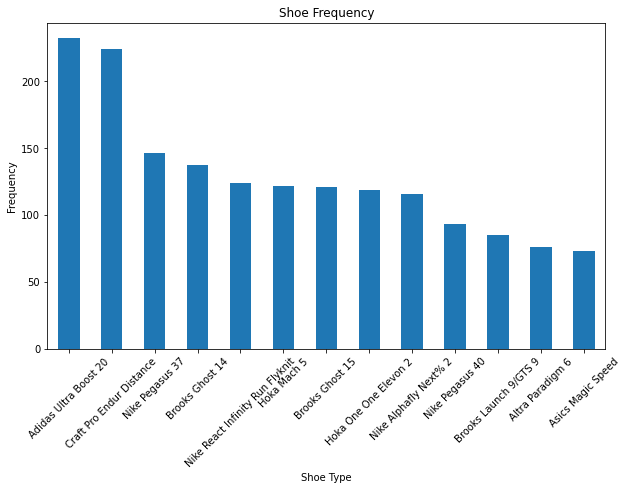

In [41]:
# Count the frequency of each shoe type
shoe_counts = cdf['Shoes'].value_counts()

# Plot a bar graph
plt.figure(figsize=(10, 6))
shoe_counts.plot(kind='bar')
plt.title('Shoe Frequency')
plt.xlabel('Shoe Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [42]:
cdf.isna().sum()  # number of NA values per column

Activity Type        0
Date                 0
Title                0
Distance             0
Calories             0
Time taken           0
Avg HR               0
Max HR               0
Avg Run Cadence      0
Max Run Cadence      0
Avg Pace             0
Best Pace            0
Elev Gain            0
Elev Loss            0
Avg Stride Length    0
Best Lap Time        0
Number of Laps       0
Time                 0
Temp                 0
Shoes                0
dtype: int64

In [43]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Activity Type      1668 non-null   object 
 1   Date               1668 non-null   object 
 2   Title              1668 non-null   object 
 3   Distance           1668 non-null   float64
 4   Calories           1668 non-null   float64
 5   Time taken         1668 non-null   float64
 6   Avg HR             1668 non-null   float64
 7   Max HR             1668 non-null   float64
 8   Avg Run Cadence    1668 non-null   float64
 9   Max Run Cadence    1668 non-null   float64
 10  Avg Pace           1668 non-null   float64
 11  Best Pace          1668 non-null   float64
 12  Elev Gain          1668 non-null   float64
 13  Elev Loss          1668 non-null   float64
 14  Avg Stride Length  1668 non-null   float64
 15  Best Lap Time      1668 non-null   float64
 16  Number of Laps     1668 

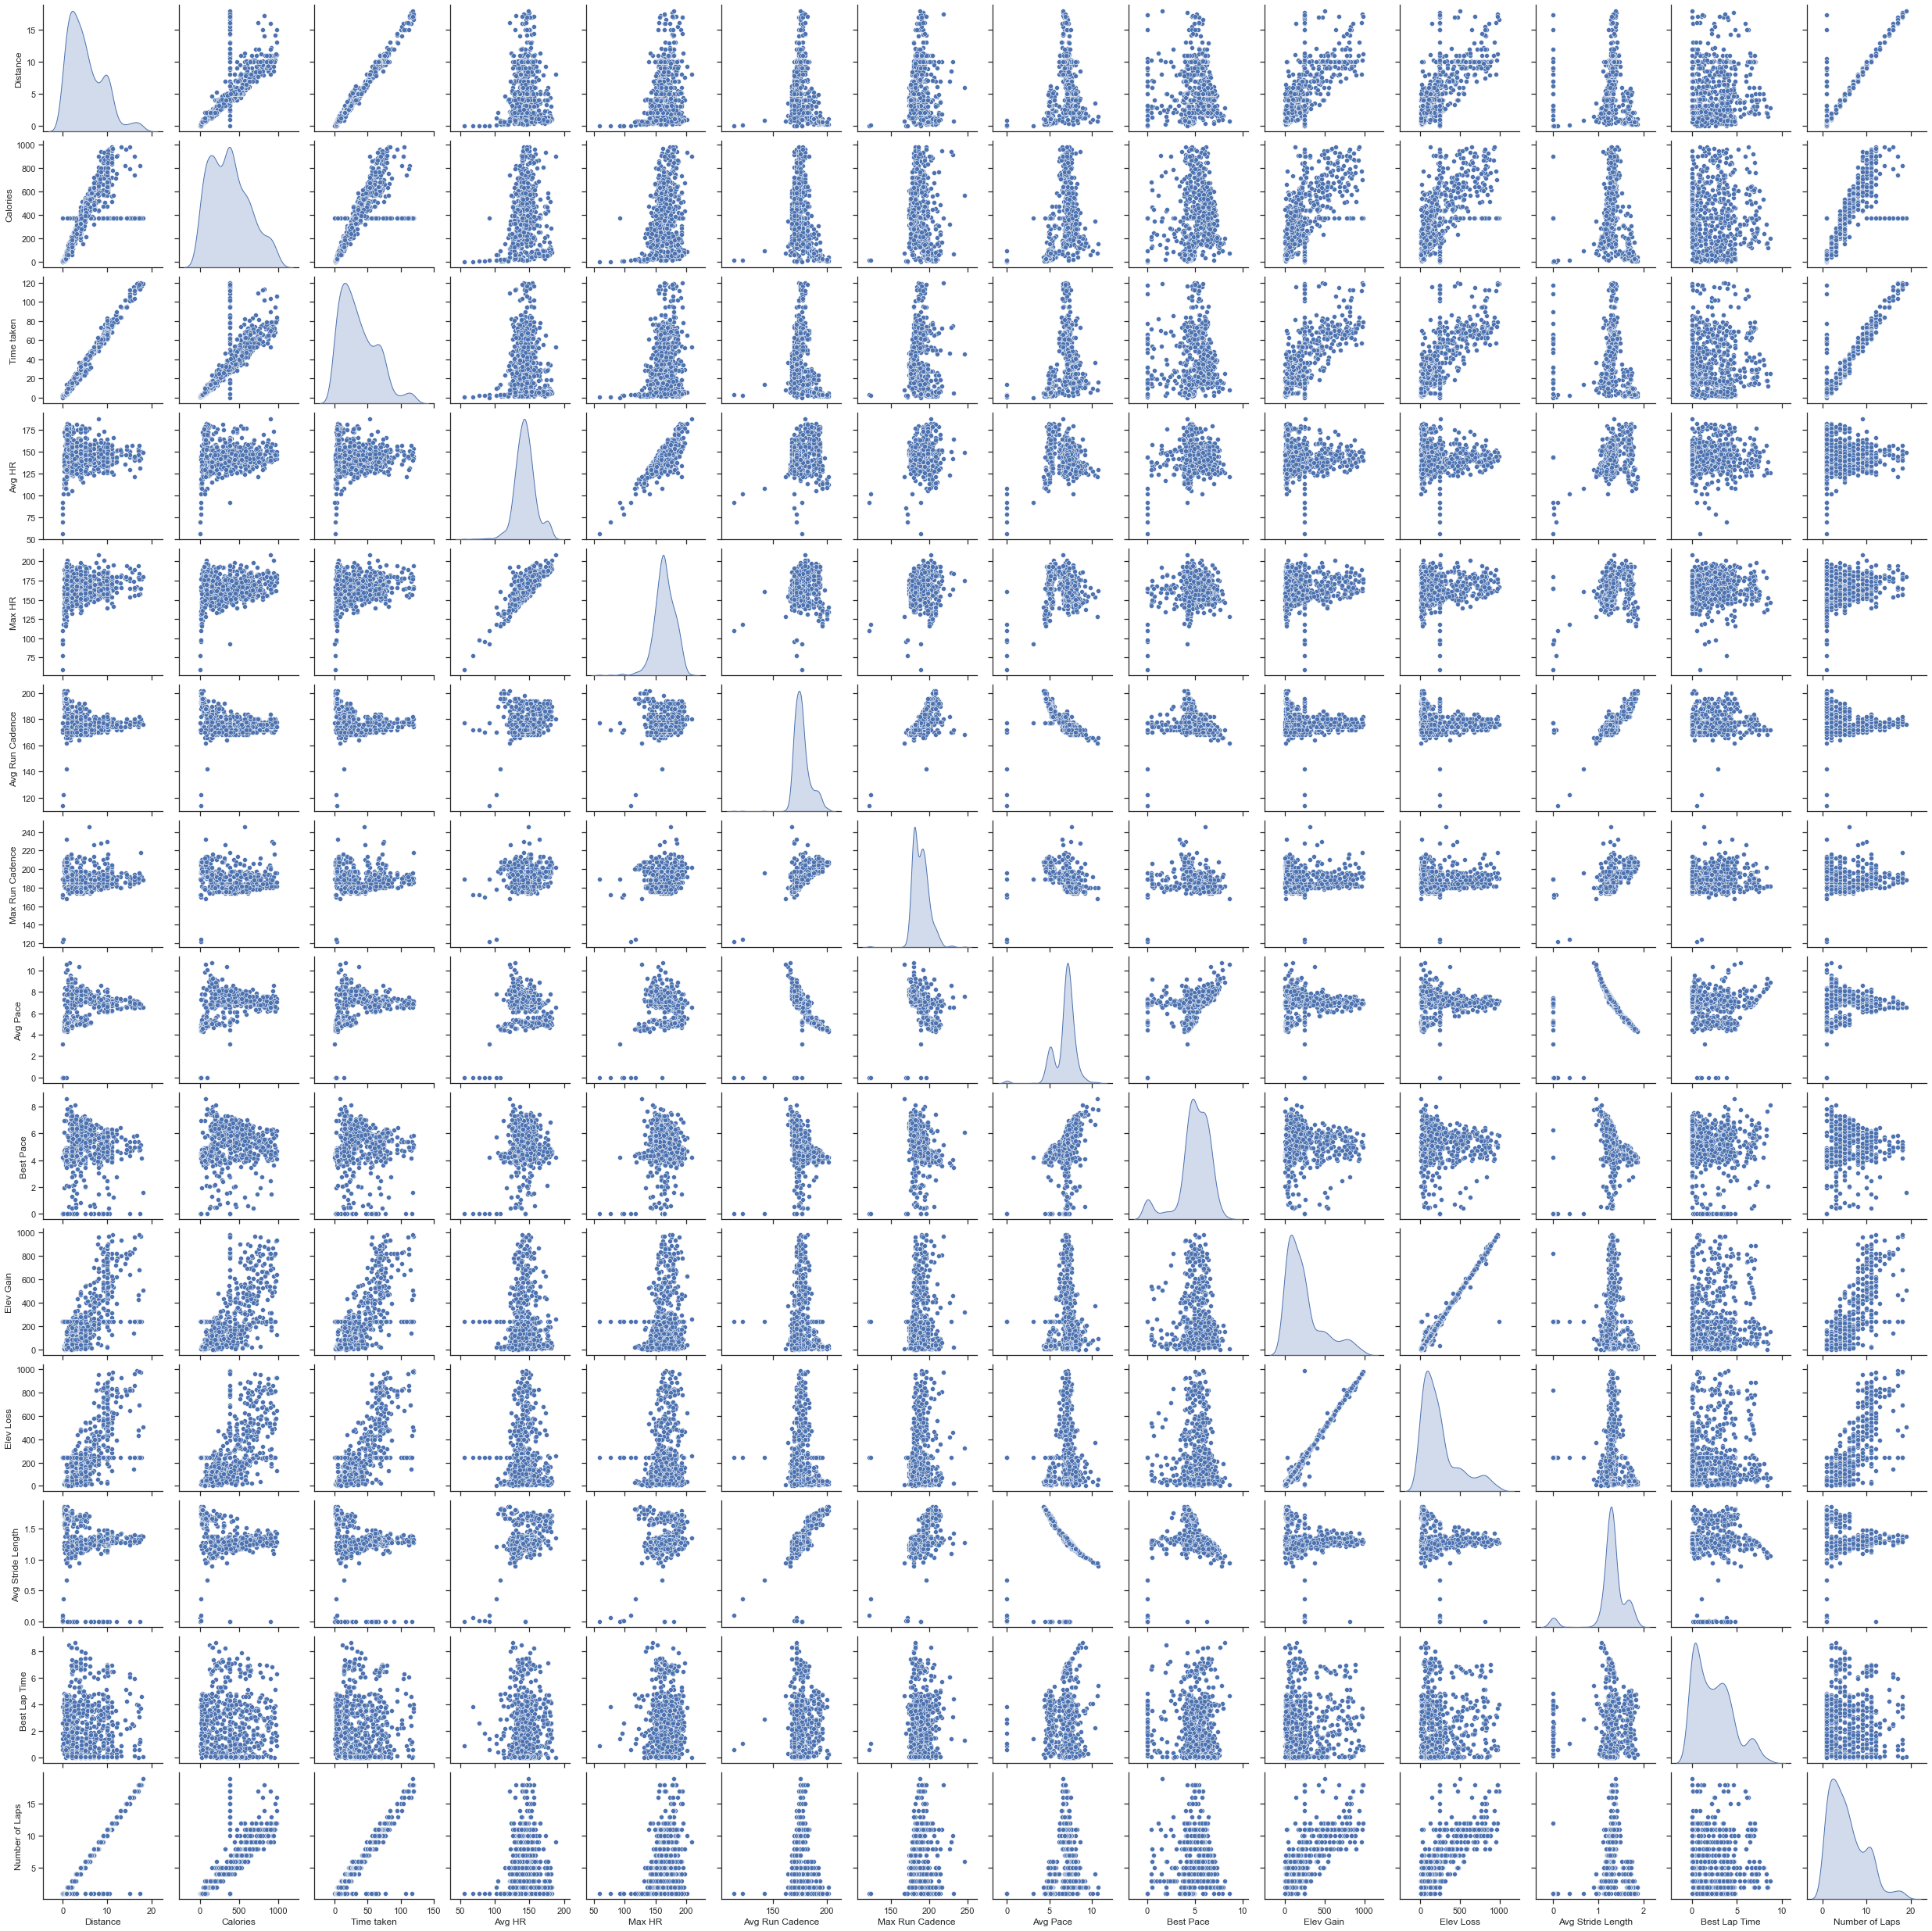

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Create a pair plot
sns.set(style="ticks")
sns.pairplot(df, diag_kind='kde', markers='o')

# Show the pair plot
plt.show()

In [45]:
cdf.to_csv("running log_cleaned.csv")

In [46]:
df['Temp'] = df['Date'].apply(generate_temperature)
df['Shoes'] = df['Date'].apply(assign_shoes)
df.to_csv("orig running log_cleaned.csv")